# Data Engineer Assessment — Fuel Price Analysis (Malaysia)
Objective:
This assessment involves extracting, transforming, analyzing, and deriving insights from Malaysia’s official weekly fuel price data, sourced from the (https://api.data.gov.my/data-catalogue?id=fuelprice). 

In [1]:
# import necessary libraries
import requests
import pandas as pd
import numpy as np
from datetime import datetime

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [2]:
# Import module and fetch data
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(project_root, 'modules'))

from fuel_price_extraction import fetch_fuel_price_data

url = "https://api.data.gov.my/data-catalogue?id=fuelprice"
raw_data = fetch_fuel_price_data(url)


2025-06-12 01:54:22,277 - INFO - Attempt 1 - Requesting data...
2025-06-12 01:54:22,934 - INFO - Data successfully retrieved!


In [3]:
import sys
sys.path.append('../modules')

from fuel_price_extraction import fetch_fuel_price_data

url = "https://api.data.gov.my/data-catalogue?id=fuelprice"
raw_data = fetch_fuel_price_data(url)

import json
print(json.dumps(raw_data[:2], indent=2))  # Just show first 2 entries

2025-06-12 01:54:22,942 - INFO - Attempt 1 - Requesting data...
2025-06-12 01:54:23,658 - INFO - Data successfully retrieved!


[
  {
    "date": "2025-06-05",
    "ron95": 2.05,
    "ron97": 3.07,
    "diesel": 2.74,
    "series_type": "level",
    "diesel_eastmsia": 2.15
  },
  {
    "date": "2025-05-29",
    "ron95": 2.05,
    "ron97": 3.1,
    "diesel": 2.77,
    "series_type": "level",
    "diesel_eastmsia": 2.15
  }
]


In [4]:
import pandas as pd

# Convert json from API to DataFrame
df = pd.DataFrame(raw_data)


In [5]:
df.head(50)

,date,ron95,ron97,diesel,series_type,diesel_eastmsia
0,2025-06-05,2.05,3.07,2.74,level,2.15
1,2025-05-29,2.05,3.10,2.77,level,2.15
2,2025-05-22,2.05,3.10,2.80,level,2.15
3,2025-05-15,2.05,3.07,2.77,level,2.15
4,2025-05-08,2.05,3.10,2.80,level,2.15
5,2025-05-01,2.05,3.18,2.88,level,2.15
6,2025-04-24,2.05,3.18,2.88,level,2.15
7,2025-04-17,2.05,3.18,2.88,level,2.15
8,2025-04-10,2.05,3.28,2.98,level,2.15
9,2025-04-03,2.05,3.33,3.03,level,2.15


In [6]:
df.rename(columns={
    'ron95': 'RON95_price',
    'ron97': 'RON97_price',
    'diesel': 'Diesel_price',
    'diesel_eastmsia': 'Diesel_price_East',
    'date': 'Date'
}, inplace=True)


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values('Date').reset_index(drop=True)

In [8]:
df = df[df['series_type'] == 'level'].copy()


In [9]:
df.shape

(412, 6)

In [10]:
df.columns.tolist()

['Date',
 'RON95_price',
 'RON97_price',
 'Diesel_price',
 'series_type',
 'Diesel_price_East']

In [11]:
df.describe()

,Date,RON95_price,RON97_price,Diesel_price,Diesel_price_East
count,412,412.00,412.00,412.00,412.00
mean,2021-06-13 06:38:26.796116480,2.03,2.91,2.22,2.11
min,2017-03-30 00:00:00,1.25,1.55,1.40,1.40
25%,2019-07-18 06:00:00,2.05,2.47,2.15,2.15
50%,2021-07-04 12:00:00,2.05,2.74,2.15,2.15
75%,2023-06-23 18:00:00,2.08,3.37,2.18,2.15
max,2025-06-05 00:00:00,2.38,4.84,3.35,2.34
std,NaN,0.17,0.66,0.36,0.15


In [12]:
missing_info = df.isnull().sum().to_frame(name='Missing Count')
missing_info['% Missing'] = (missing_info['Missing Count'] / len(df)) * 100
print("\nMissing Value Summary:\n", missing_info)


Missing Value Summary:
                    Missing Count  % Missing
Date                           0       0.00
RON95_price                    0       0.00
RON97_price                    0       0.00
Diesel_price                   0       0.00
series_type                    0       0.00
Diesel_price_East              0       0.00


In [13]:
df['RON95_diff'] = df['RON95_price'].diff()
df['RON97_diff'] = df['RON97_price'].diff()
df['Diesel_diff'] = df['Diesel_price'].diff()
df['DieselEast_diff'] = df['Diesel_price_East'].diff()


In [14]:
df['RON95_rolling4'] = df['RON95_price'].rolling(4).mean()
df['RON97_rolling4'] = df['RON97_price'].rolling(4).mean()
df['Diesel_rolling4'] = df['Diesel_price'].rolling(4).mean()
df['DieselEast_rolling4'] = df['Diesel_price_East'].rolling(4).mean()


In [15]:
df['Year'] = df['Date'].dt.year

In [16]:
print(df.head())


        Date  RON95_price  RON97_price  Diesel_price series_type  \
0 2017-03-30         2.13         2.41          2.11       level   
1 2017-04-06         2.16         2.43          2.08       level   
4 2017-04-13         2.24         2.52          2.16       level   
5 2017-04-20         2.27         2.54          2.21       level   
8 2017-04-27         2.21         2.49          2.14       level   

   Diesel_price_East  RON95_diff  RON97_diff  Diesel_diff  DieselEast_diff  \
0               2.11         NaN         NaN          NaN              NaN   
1               2.08        0.03        0.02        -0.03            -0.03   
4               2.16        0.08        0.09         0.08             0.08   
5               2.21        0.03        0.02         0.05             0.05   
8               2.14       -0.06       -0.05        -0.07            -0.07   

   RON95_rolling4  RON97_rolling4  Diesel_rolling4  DieselEast_rolling4  Year  
0             NaN             NaN         

In [17]:
df = df.dropna()  


In [18]:
df.to_csv('cleaned_fuel_data.csv', index=False)


In [19]:
import matplotlib.pyplot as plt

In [20]:
#df = pd.read_csv('cleaned_fuel_data.csv')
df['Date'] = pd.to_datetime(df['Date'])  # ensure datetime format
df = df.sort_values('Date')

In [21]:
print("Basic Summary Statistics")
print(df[['RON95_price', 'RON97_price', 'Diesel_price', 'Diesel_price_East']].describe())

Basic Summary Statistics
       RON95_price  RON97_price  Diesel_price  Diesel_price_East
count       409.00       409.00        409.00             409.00
mean          2.02         2.92          2.22               2.11
std           0.17         0.66          0.36               0.15
min           1.25         1.55          1.40               1.40
25%           2.05         2.47          2.15               2.15
50%           2.05         2.74          2.15               2.15
75%           2.08         3.37          2.18               2.15
max           2.38         4.84          3.35               2.34


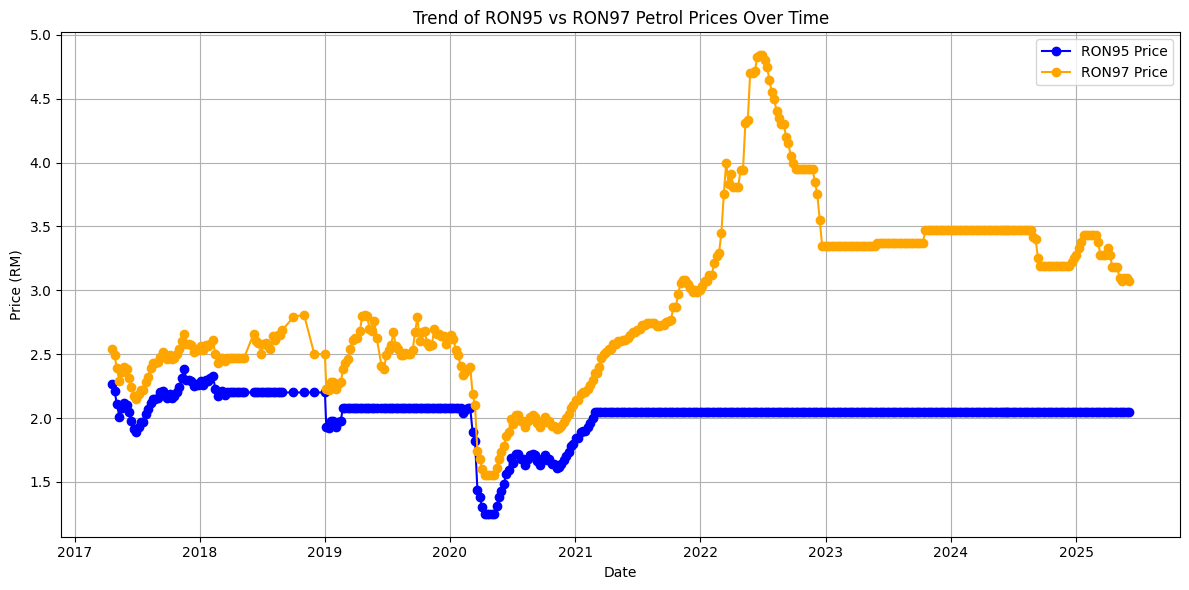

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['RON95_price'], label='RON95 Price', color='blue', marker='o')
plt.plot(df['Date'], df['RON97_price'], label='RON97 Price', color='orange', marker='o')
plt.title('Trend of RON95 vs RON97 Petrol Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (RM)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


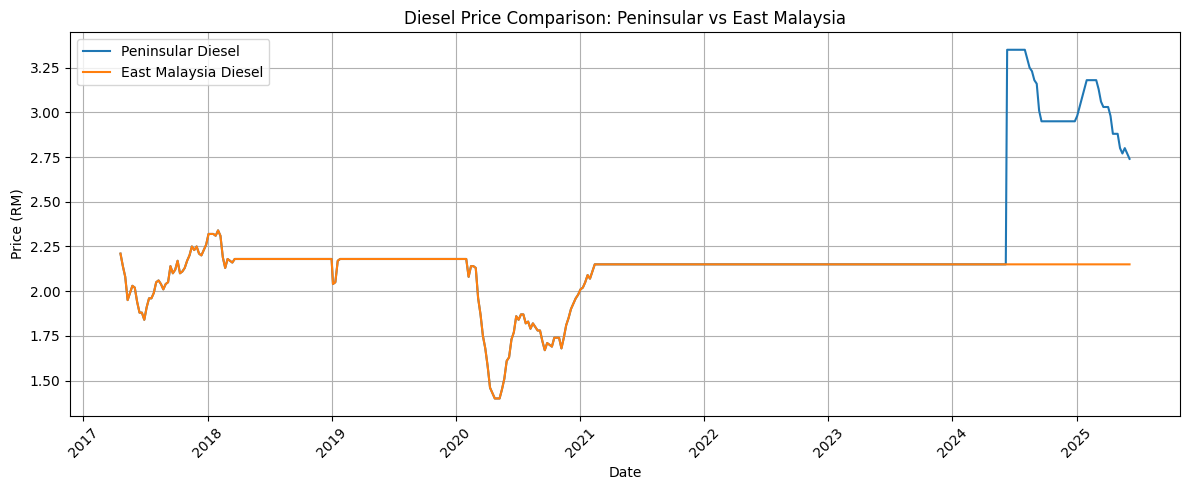

In [23]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Date', y='Diesel_price', label='Peninsular Diesel')
sns.lineplot(data=df, x='Date', y='Diesel_price_East', label='East Malaysia Diesel')
plt.title('Diesel Price Comparison: Peninsular vs East Malaysia')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

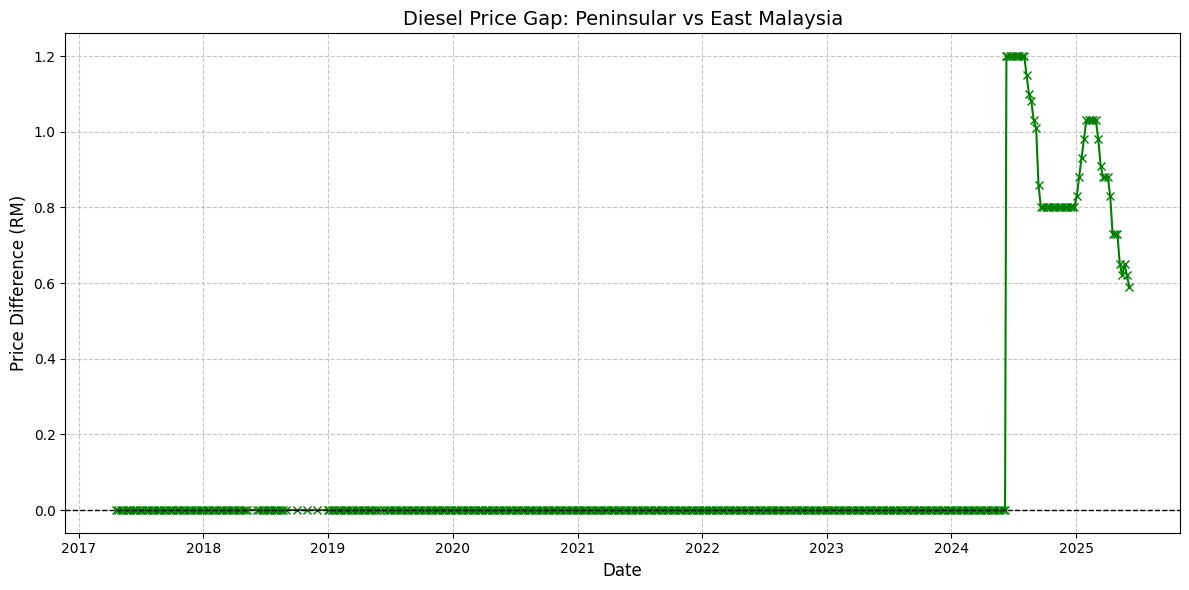

In [24]:
# Calculate the price gap
df['Diesel_Price_Gap'] = df['Diesel_price'] - df['Diesel_price_East']

# Plot the price gap over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Diesel_Price_Gap'], color='green', marker='x', linestyle='-')
plt.title('Diesel Price Gap: Peninsular vs East Malaysia', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price Difference (RM)', fontsize=12)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


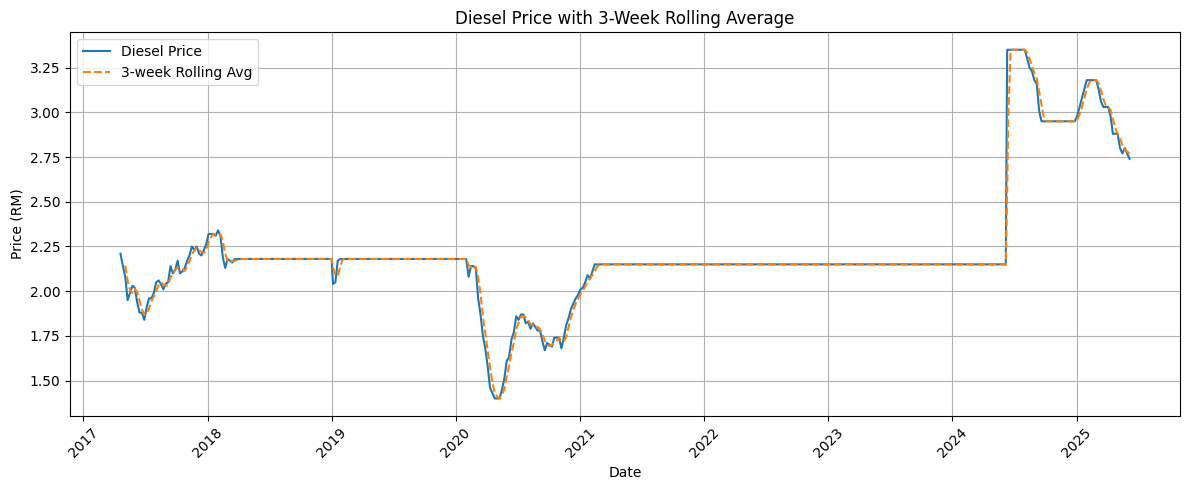

In [25]:
# Plot: Rolling average of Diesel prices (last 3 weeks)
df['Diesel_rolling3'] = df['Diesel_price'].rolling(3).mean()
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Date', y='Diesel_price', label='Diesel Price')
sns.lineplot(data=df, x='Date', y='Diesel_rolling3', label='3-week Rolling Avg', linestyle='--')
plt.title('Diesel Price with 3-Week Rolling Average')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

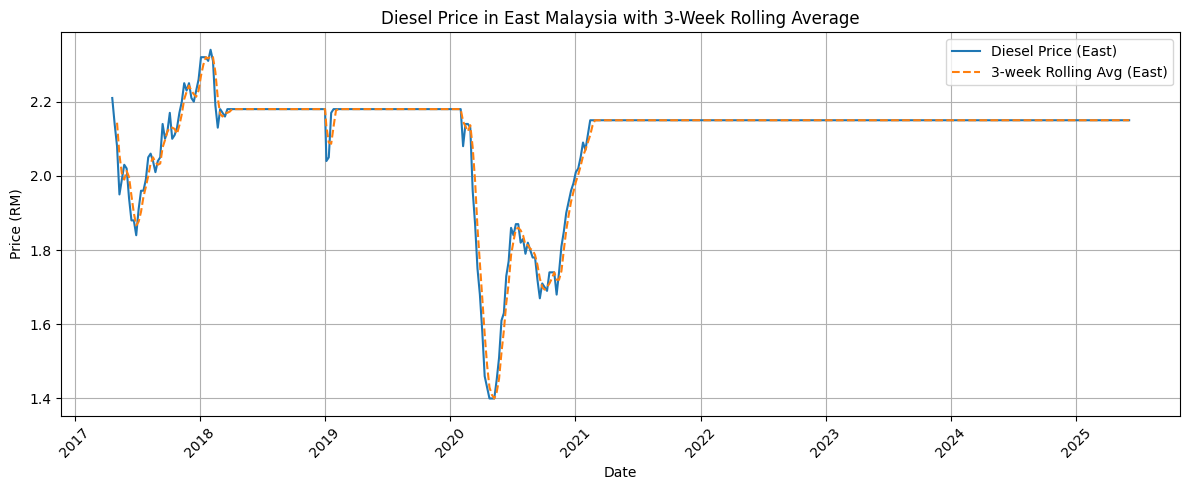

In [26]:
# Plot: Rolling average of Diesel prices (East Malaysia, last 3 weeks)
df['DieselEast_rolling3'] = df['Diesel_price_East'].rolling(3).mean()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Date', y='Diesel_price_East', label='Diesel Price (East)')
sns.lineplot(data=df, x='Date', y='DieselEast_rolling3', label='3-week Rolling Avg (East)', linestyle='--')

plt.title('Diesel Price in East Malaysia with 3-Week Rolling Average')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


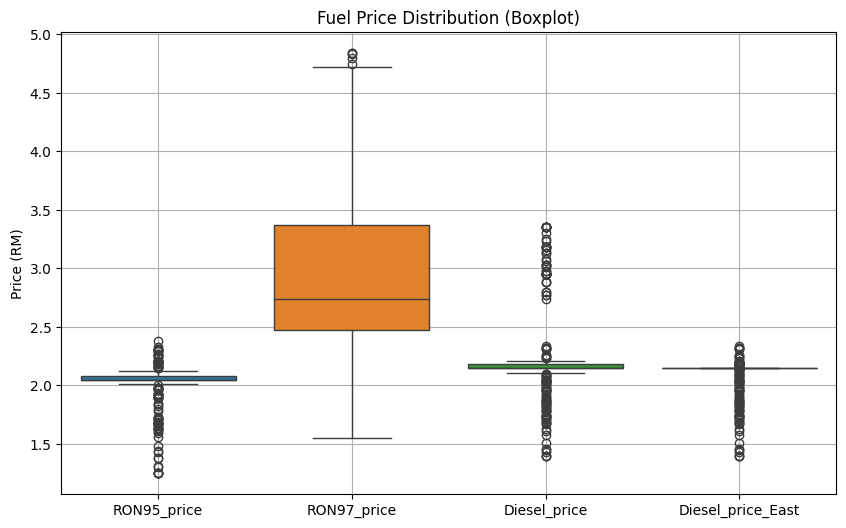

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['RON95_price', 'RON97_price', 'Diesel_price', 'Diesel_price_East']])
plt.title('Fuel Price Distribution (Boxplot)')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.show()


In [28]:
biggest_jump = df[['Date', 'RON97_diff']].loc[df['RON97_diff'].abs().idxmax()]
date_of_jump = biggest_jump['Date'].date()
change_value = round(biggest_jump['RON97_diff'], 2)

print(f"\nWeek with largest RON97 price change: {date_of_jump} | Change: {change_value} RM")



Week with largest RON97 price change: 2022-05-26 | Change: 0.37 RM


In [29]:
diesel_gap_change_start = df[df['Diesel_Price_Gap'] != 0].iloc[0]
print(f"\nFirst noticeable diesel price difference appeared on: {diesel_gap_change_start['Date'].date()}")
print(f"  Peninsular Diesel: {diesel_gap_change_start['Diesel_price']} RM")
print(f"  East Malaysia Diesel: {diesel_gap_change_start['Diesel_price_East']} RM")


First noticeable diesel price difference appeared on: 2024-06-10
  Peninsular Diesel: 3.35 RM
  East Malaysia Diesel: 2.15 RM


In [30]:
# Standard deviation of weekly price differences
volatility = {
    'RON95': df['RON95_diff'].std(),
    'RON97': df['RON97_diff'].std(),
    'Diesel': df['Diesel_diff'].std(),
    'Diesel East': df['DieselEast_diff'].std()
}

volatility_df = pd.DataFrame.from_dict(volatility, orient='index', columns=['Volatility (Std Dev)'])
print("\nFuel Price Volatility:")
print(volatility_df.sort_values(by='Volatility (Std Dev)', ascending=False))



Fuel Price Volatility:
             Volatility (Std Dev)
Diesel                       0.07
RON97                        0.07
RON95                        0.03
Diesel East                  0.03


In [31]:
def change_counts(series, name):
    up = (series > 0).sum()
    down = (series < 0).sum()
    flat = (series == 0).sum()
    return pd.Series([up, down, flat], index=['Up', 'Down', 'No Change'], name=name)

change_summary = pd.concat([
    change_counts(df['RON95_diff'], 'RON95'),
    change_counts(df['RON97_diff'], 'RON97'),
    change_counts(df['Diesel_diff'], 'Diesel')
], axis=1)

print("\nPrice Movement Summary:")
print(change_summary)



Price Movement Summary:
           RON95  RON97  Diesel
Up            60    143      61
Down          39    101      58
No Change    310    165     290


In [32]:
df['Year'] = df['Date'].dt.year
yoy_avg = df.groupby('Year')[['RON95_price', 'RON97_price', 'Diesel_price', 'Diesel_price_East']].mean().round(2)
print("\nYearly Average Prices:")
print(yoy_avg)



Yearly Average Prices:
      RON95_price  RON97_price  Diesel_price  Diesel_price_East
Year                                                           
2017         2.14         2.42          2.08               2.08
2018         2.22         2.56          2.20               2.20
2019         2.07         2.55          2.17               2.17
2020         1.67         1.99          1.80               1.80
2021         2.03         2.65          2.14               2.14
2022         2.05         3.98          2.15               2.15
2023         2.05         3.38          2.15               2.15
2024         2.05         3.39          2.70               2.15
2025         2.05         3.28          3.00               2.15


In [33]:
top5 = df.nlargest(5, 'RON97_price')[['Date', 'RON95_price', 'RON97_price', 'Diesel_price', 'Diesel_price_East']]
print("\nTop 5 Weeks with Highest RON97 Prices:")
print(top5.to_string(index=False))



Top 5 Weeks with Highest RON97 Prices:
      Date  RON95_price  RON97_price  Diesel_price  Diesel_price_East
2022-06-23         2.05         4.84          2.15               2.15
2022-06-30         2.05         4.84          2.15               2.15
2022-06-16         2.05         4.83          2.15               2.15
2022-07-07         2.05         4.80          2.15               2.15
2022-07-14         2.05         4.75          2.15               2.15


In [34]:
import pandas as pd

# Group data by fuel type stats (only for 'level' series)
summary = {
    'RON95': {
        'avg_price': df['RON95_price'].mean(),
        'std_dev': df['RON95_price'].std(),
        'percent_change': ((df['RON95_price'].iloc[-1] - df['RON95_price'].iloc[0]) / df['RON95_price'].iloc[0]) * 100
    },
    'RON97': {
        'avg_price': df['RON97_price'].mean(),
        'std_dev': df['RON97_price'].std(),
        'percent_change': ((df['RON97_price'].iloc[-1] - df['RON97_price'].iloc[0]) / df['RON97_price'].iloc[0]) * 100
    },
    'Diesel': {
        'avg_price': df['Diesel_price'].mean(),
        'std_dev': df['Diesel_price'].std(),
        'percent_change': ((df['Diesel_price'].iloc[-1] - df['Diesel_price'].iloc[0]) / df['Diesel_price'].iloc[0]) * 100
    },
    'Diesel_EastMalaysia': {
        'avg_price': df['Diesel_price_East'].mean(),
        'std_dev': df['Diesel_price_East'].std(),
        'percent_change': ((df['Diesel_price_East'].iloc[-1] - df['Diesel_price_East'].iloc[0]) / df['Diesel_price_East'].iloc[0]) * 100
    }
}

# Convert to DataFrame
summary_df = pd.DataFrame(summary).T
summary_df.columns = ['Average Price (RM)', 'Price Std Dev (Volatility)', 'Overall % Change']

# Round for clean presentation
summary_df = summary_df.round(3)

# Display insight summary
print("Fuel Price Insight Summary:")
display(summary_df)


Fuel Price Insight Summary:


,Average Price (RM),Price Std Dev (Volatility),Overall % Change
RON95,2.02,0.17,-9.69
RON97,2.92,0.66,20.87
Diesel,2.22,0.36,23.98
Diesel_EastMalaysia,2.10,0.15,-2.71


The data clearly shows a dual pricing strategy where RON95 and East Malaysia Diesel are kept stable via subsidies, while RON97 and Peninsular Diesel are exposed to market fluctuations, with significant price hikes over time. This reflects a gradual subsidy phase-out and a push toward targeted fuel assistance rather than blanket subsidies.